# Test plane-based registration

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
from scipy.spatial.transform import Rotation as R

import planeslam.geometry as geometry
import planeslam.io as io
from planeslam.extraction import pc_to_planes

Read in airsim LiDAR and pose data

In [3]:
# Read in point cloud data
binpath = os.path.join(os.getcwd(),'..', '..', 'data', 'airsim', 'blocks_20_samples_1', 'lidar', 'Drone0')
PC_data = io.read_lidar_bin(binpath)

In [4]:
# Read in ground-truth poses (in drone local frame)
posepath = os.path.join(os.getcwd(),'..', '..', 'data', 'airsim', 'blocks_20_samples_1', 'poses', 'Drone0')
drone_positions, drone_orientations = io.read_poses(posepath)

Extract planes 

In [5]:
num_scans = len(PC_data)
scans = num_scans * [None]
scans_transformed = num_scans * [None]
for i in range(num_scans):
    scans[i] = pc_to_planes(PC_data[i])

Text(0.5, 0.5, 'Y')

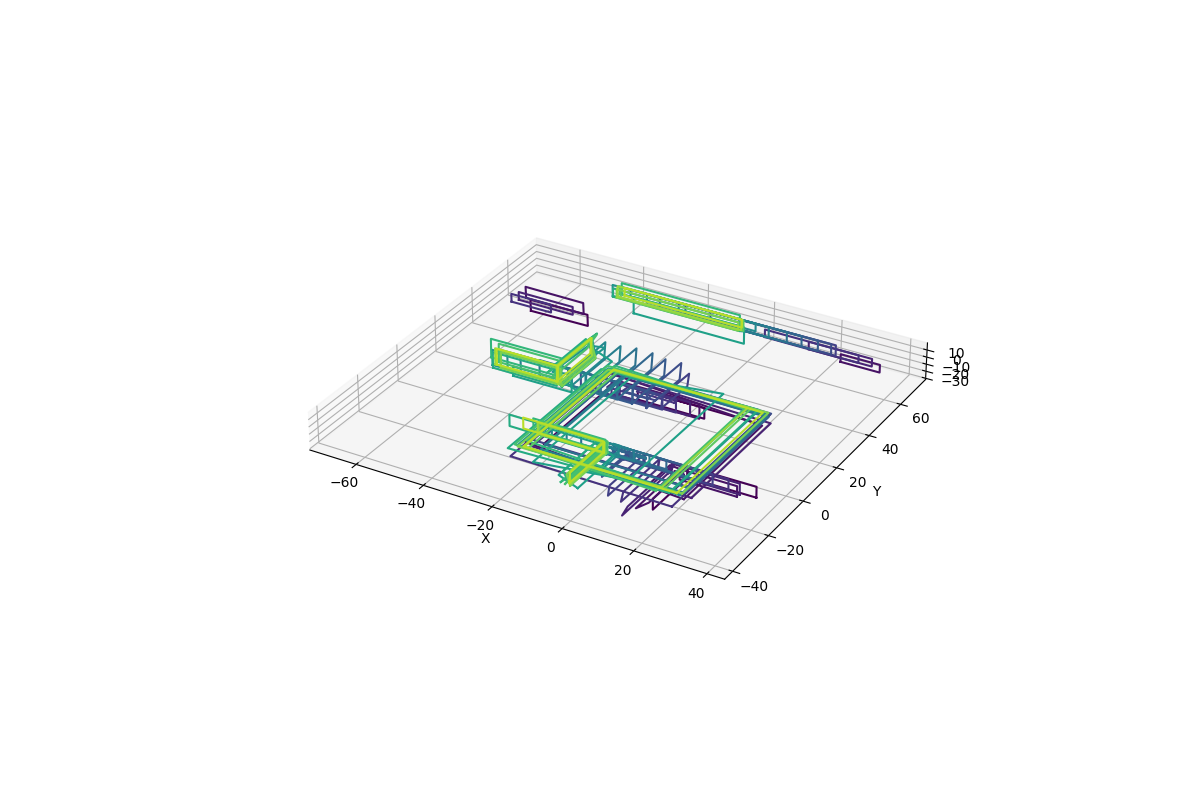

In [6]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
cmap = cm.get_cmap('viridis')
cmap_idxs = int(len(cmap.colors) / num_scans) * np.arange(num_scans)
colors = np.asarray(cmap.colors)[cmap_idxs,:]

for i, s in enumerate(scans):
    for p in s:
        p.plot(ax, color=colors[i])

ax.set_box_aspect((np.ptp(PC_data[0][:,0]), np.ptp(PC_data[0][:,1]), np.ptp(PC_data[0][:,2])))
ax.set_xlabel("X")
ax.set_ylabel("Y")

Get correspondences

In [ ]:
P = scans[0]
Q = scans[1]

Test Gauss-Newton registration

In [ ]:
def transform_normals(n, q):
    """Transform normals

    n(q) = [...,Rn_i,...]

    """

def transform_dists(rho, n, q):
    """Transform dists

    rho(q) = [...,(R n_i)^T t + rho_i,...]

    """


def residual(n_s, rho_s, n_t, rho_t, q):
    """Residual for Gauss-Newton
    
    """
    


def jacobian(n_s, q):
    """Jacobian for Gauss-Newton
    
    """

In [8]:
scans[0][0].normal

array([[-4.55292970e-04],
       [ 2.19370533e-04],
       [-9.99999872e-01]])

In [ ]:
# Get n's and rho's
n_s = np.array((3,len(scans[0])))

In [15]:
# Initial transformation
t = np.zeros((3,1))
u = np.array([1, 0, 0])[:,None]
theta = 0
q = np.vstack((t, theta*u))


# Gauss-Newton
n_iters = 5

for i in range(n_iters):
    J = jacobian(n_s, q)
    q = q - np.linalg.inv(J.T @ J) @ J.T residual(n_s, rho_s, n_t, rho_t, q)